# Stake Pool Reawards Analysis

### Library

In [222]:
import os, sys
import seaborn as sns
from sklearn import preprocessing
from cardano_explorer import blockfrost_api
from sklearn.preprocessing import MinMaxScaler

# Import API Key from the config.py file in dev mode
path = '{}/{}'.format(os.path.dirname(os.path.abspath('..')), 'config.py')
if os.path.exists(path):
    sys.path.insert(0,'../..')
    import config
    blockfrost_api_key= config.blockfrost_api_key

# Seaborn configuration
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

### Blockfrost Auth

In [223]:
cardano_mainnet = blockfrost_api.Auth(blockfrost_api_key)

### Get data to explained the stake pool rewards

In [199]:
stake_address = 'stake1uyttshgm6jtejckv48tll58hfw3fg2ffrcc4d5qvcc4yc7q9jsalf'
stake_rewards_info = cardano_mainnet.rewards_history_analysis(stake_address, pandas=True) 
stake_rewards_info

,epoch,rewards_amount,stake_amount,pool_id,epoch_start_time,epoch_end_time,epoch_first_block_time,epoch_last_block_time,epoch_block_count,epoch_tx_count,epoch_output,epoch_fees,epoch_active_stake,stake_pool_blocks,stake_pool_active_stake,stake_pool_active_size,stake_pool_delegators_count,stake_pool_rewards,stake_pool_fees
0,273,587159,998824863,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1624139091,1624571091,1624139124,1624571089,21464,150752,15740586909359854,32570360903,23075664958746578,39,47829822938326,0.002073,1120,28740378749,624003787
1,274,715853,998824863,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1624571091,1625003091,1624571155,1625003071,21521,133041,11764235372205745,28650900551,23094302016775953,50,50332107694676,0.002179,1174,36776812909,704368129
2,275,902199,1618824863,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1625003091,1625435091,1625003255,1625435086,21505,136339,13402253806474700,29088470734,23006172979540278,37,47430899220515,0.002062,1190,27005861046,606658610
3,276,824733,1619412022,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1625435091,1625867091,1625435146,1625867083,21298,144737,12581437590766031,30139500685,23092420021153886,33,46277458382635,0.002004,1204,24108337832,577683378
4,277,1056705,1620127875,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1625867091,1626299091,1625867167,1626299088,21323,135191,9892737538002395,28508156761,23196615273348567,41,45104996094565,0.001944,1221,30007226603,636672266
5,278,1192163,2001851681,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1626299091,1626731091,1626299100,1626731079,21352,133567,7769775574167205,28124230492,23196379717228316,38,45622868763774,0.001967,1235,27779196829,614391968
6,279,1397178,2002676414,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1626731091,1627163091,1626731219,1627163081,21404,131829,10662572699883986,27651228864,23210733595257321,44,45078952814252,0.001942,1242,32105401862,657654018
7,280,1695805,2203733119,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1627163091,1627595091,1627163136,1627595084,21204,137225,13309464381982500,31570674668,23230827525683631,44,40802637360105,0.001756,1231,32053190279,657131902
8,281,1456345,2204925282,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1627595091,1628027091,1627595198,1628027082,21411,141713,9992892114370167,30198103953,23254470605645231,38,40919070251714,0.001760,1234,27638870752,612988707
9,282,1587885,2206322460,pool1ekhy5xsgjaq38em75vevk8df0k0rljju77tljw288...,1628027091,1628459091,1628027091,1628459086,21452,157622,10815888045778149,33861288926,23244660857359753,41,40435216418357,0.001740,1234,29733858084,633938580


### Pre Processing 

In [189]:
def convert_lovelace_to_ada(lovelace):
    # 1 ADA = 1.000.000 de Lovelace
    return lovelace / (1000*1000)

column_names = stake_rewards_info.columns.tolist()

# Change the values type in the columns if they are numeric values
for col_nb, value in enumerate(stake_rewards_info.iloc[0]):
    try:
        stake_rewards_info[column_names[col_nb]] = stake_rewards_info[column_names[col_nb]].astype(float) 
    except:
        continue
        
# Convert Lovelance unit in ADA
column_to_convert = ['rewards_amount', 'stake_amount', 'stake_pool_active_stake', 'stake_pool_rewards', 'stake_pool_fees']

for col_name in column_to_convert:
    stake_rewards_info[col_name] = stake_rewards_info[col_name].apply(lambda x: convert_lovelace_to_ada(x))  

In [194]:
stake_rewards_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   epoch                        21 non-null     float64
 1   rewards_amount               21 non-null     float64
 2   stake_amount                 21 non-null     float64
 3   pool_id                      21 non-null     object 
 4   epoch_start_time             21 non-null     float64
 5   epoch_end_time               21 non-null     float64
 6   epoch_first_block_time       21 non-null     float64
 7   epoch_last_block_time        21 non-null     float64
 8   epoch_block_count            21 non-null     float64
 9   epoch_tx_count               21 non-null     float64
 10  epoch_output                 21 non-null     float64
 11  epoch_fees                   21 non-null     float64
 12  epoch_active_stake           21 non-null     float64
 13  stake_pool_blocks     

<AxesSubplot:>

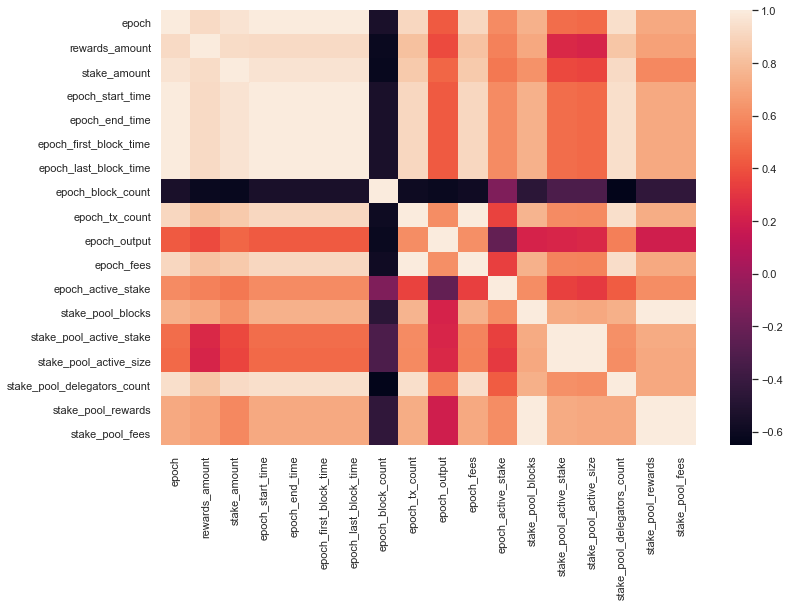

In [18]:
sns.heatmap(stake_rewards_info.corr())

In [190]:
def chart_relationships(df, x, y, label_text, title_text):
    
    fig = px.scatter(df, x=x, y=y, text=label_text, log_x=True, size_max=60)
    
    fig.update_traces(textposition='top center')
    
    fig.update_layout(
        height=800,
        title_text=title_text)
    
    return fig.show()

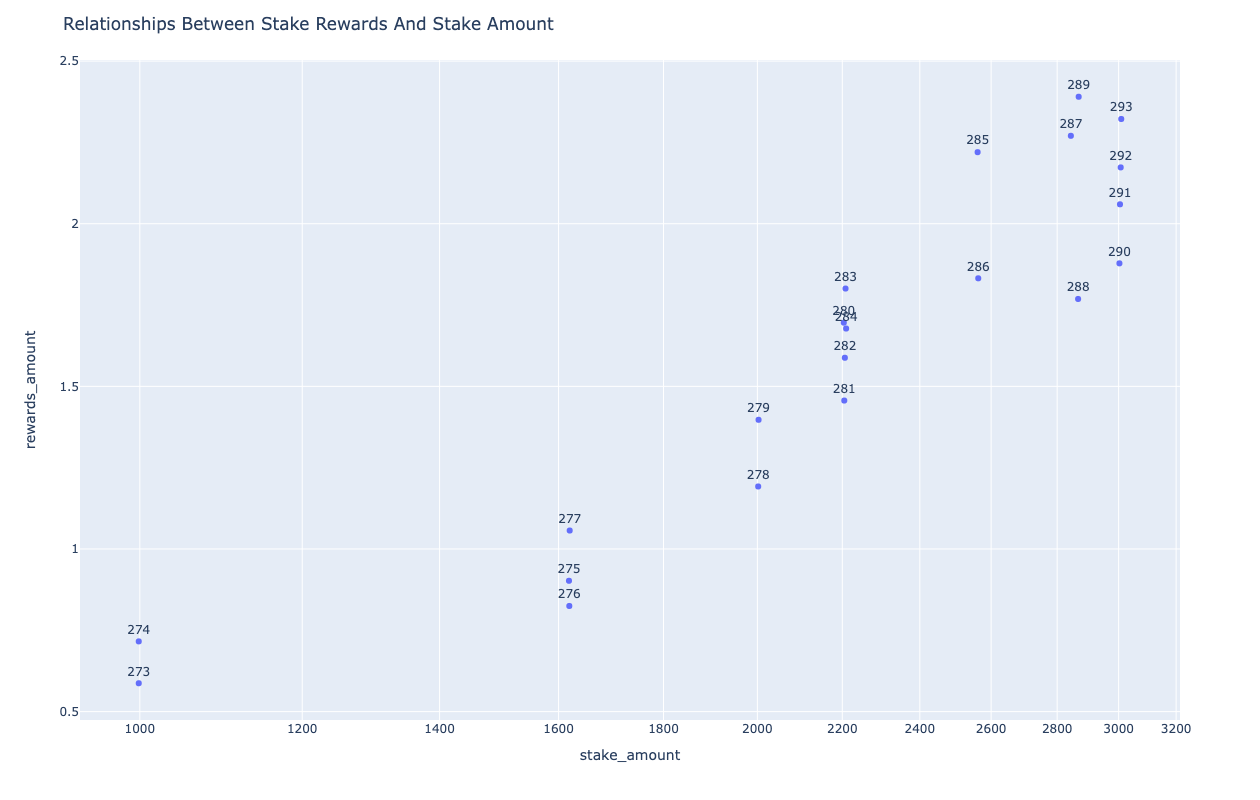

In [191]:
chart_relationships(stake_rewards_info,
                    x='stake_amount',
                    y='rewards_amount',
                    label_text='epoch',
                    title_text='Relationships Between Stake Rewards And Stake Amount')

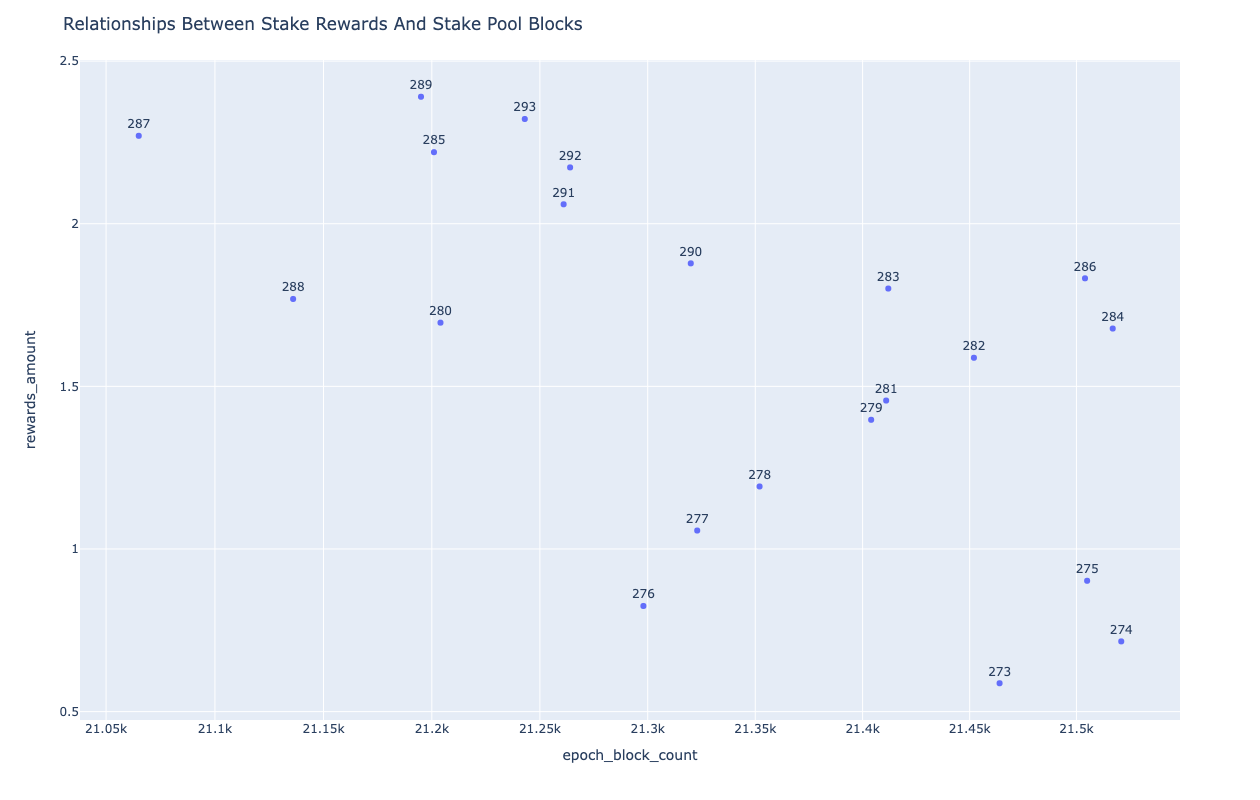

In [192]:
chart_relationships(stake_rewards_info,
                    x='epoch_block_count',
                    y='rewards_amount',
                    label_text='epoch',
                    title_text='Relationships Between Stake Rewards And Stake Pool Blocks')

### Relationships Between The Rewards And The Number Of Blocks Create By the Stake Pool

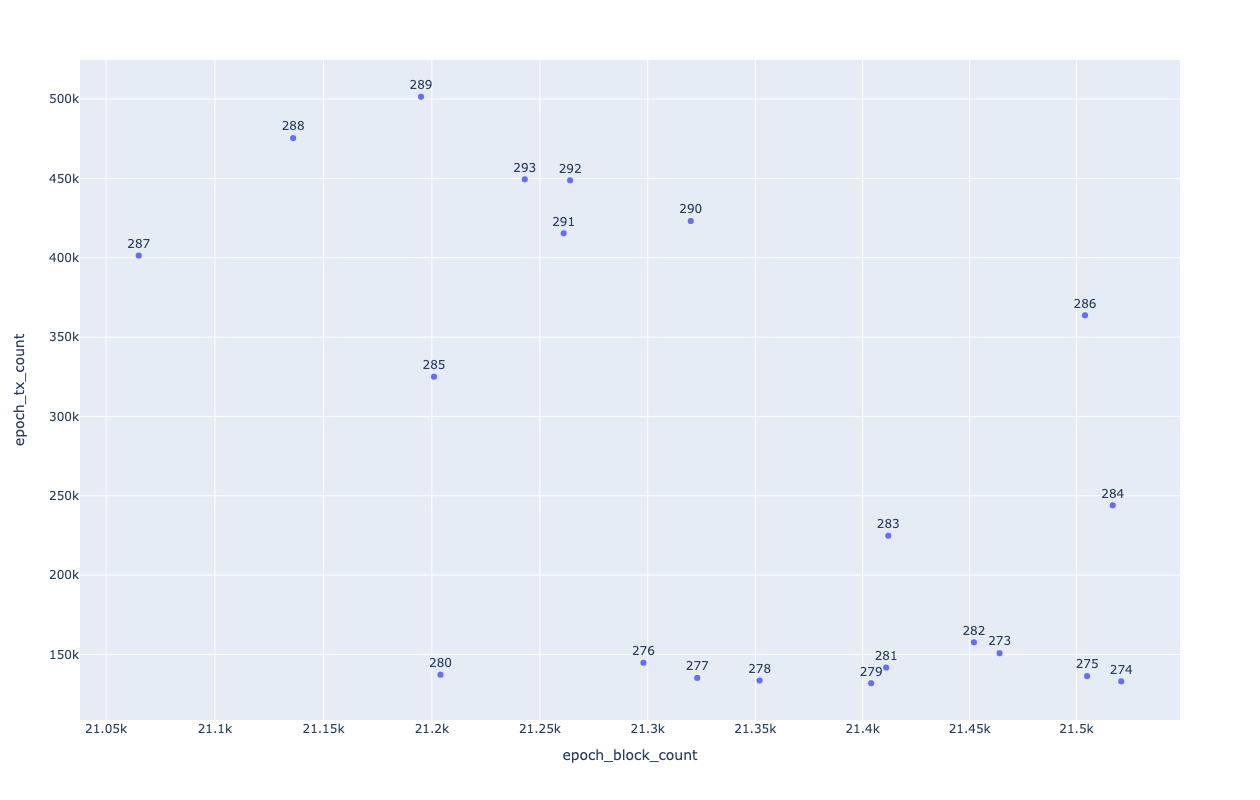

In [193]:
chart_relationships(stake_rewards_info,
                    x='epoch_block_count',
                    y='epoch_tx_count',
                    label_text='epoch',
                    title_text='')

In [ ]:
chart_relationships(stake_rewards_info,
                    x='epoch_block_count',
                    y='epoch_tx_count',
                    label_text='epoch',
                    title_text='')

In [98]:
import plotly.graph_objects as go

In [198]:
# Scalling 
min = stake_rewards_info['rewards_amount'].min()
max = stake_rewards_info['rewards_amount'].max()

scaler = MinMaxScaler(feature_range=(min, max))
scall_stake_pool_blocks = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["stake_pool_blocks"]]))[0].tolist()
scall_stake_amount = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["stake_amount"]]))[0].tolist()
scall_stake_pool_delegators_count = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["stake_pool_delegators_count"]]))[0].tolist()
sacll_epoch_tx_count = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["epoch_tx_count"]]))[0].tolist()
scall_stake_pool_rewards = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["stake_pool_rewards"]]))[0].tolist()

f = go.FigureWidget().update_layout(height=700)
f.add_scatter(y=scall_stake_amount, name='Volume Of Stake Amount')
f.add_scatter(y=scall_stake_pool_blocks, name='Volume Of Stake Pool Block')
f.add_scatter(y=scall_stake_pool_delegators_count, name='Volume Of Stake Pool Delegators')
f.add_scatter(y=sacll_epoch_tx_count, name='Volume Of Epochs Transactions')
f.add_scatter(y=scall_stake_pool_rewards, name='Volume Of Stake Pool Rewards')
f.add_bar(y=stake_rewards_info['rewards_amount'].tolist(), name='Stake Rewards (ADA)') 

FigureWidget({
    'data': [{'name': 'Volume Of Stake Amount',
              'type': 'scatter',
              …

###  Stake Pool Performance Analysis 

In [165]:
# Scalling 
min = stake_rewards_info['stake_pool_blocks'].min()
max = stake_rewards_info['stake_pool_blocks'].max()

scaler = MinMaxScaler(feature_range=(min, max))
scall_epoch_tx_count = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["epoch_tx_count"]]))[0].tolist()
scall_epoch_block_count = pd.DataFrame.from_dict(scaler.fit_transform(stake_rewards_info[["epoch_block_count"]]))[0].tolist()

f = go.FigureWidget().update_layout(height=700)
f.add_scatter(y=scall_epoch_tx_count, name='Volume Of Transactions For Each Epoch')
f.add_scatter(y=scall_epoch_block_count, name='Volume Of Block Validated Pear Epoch')
f.add_bar(y=stake_rewards_info['stake_pool_blocks'].tolist(), name='Stake Pool Validated Block Pear Epoch') 

FigureWidget({
    'data': [{'name': 'Volume Of Transactions For Each Epoch',
              'type': 'scatter',…